
#### Procesamiento Digital de Señales

# Trabajo Práctico 2
#### Ramiro Castagnola

***
## Ventanas


<div class="alert alert-block alert-info">
<b>1)</b> Implemente las funciones para generar las siguientes ventanas $w(k)$:

</div>

+ Bartlett ó triangular
+ Hann
+ Blackman
+ Flat-top



<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede consultar el capítulo 6.3 del libro de B. Porat para obtener las expresiones analíticas de cada ventana.

</div>

   a) Para cada ventana grafique $w(k)$ y el módulo de su espectro $ \lvert W(\Omega) \rvert $


In [1]:
## Inicialización del Notebook del TP2

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
import scipy.signal as signal

N  = 1000 # muestras
fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################
def Rectangular (N,x):
    
    ventana = signal.boxcar(N)
    
    salida = np.multiply(x,ventana)

    return salida

def Bartlett (N,x):
    
    ventana = signal.bartlett(N)
    
    salida = np.multiply(x,ventana)

    return salida

def Hann (N,x):
    
    ventana = signal.windows.hann(N)
    
    salida = np.multiply(x,ventana)

    return salida

def Blackman (N,x):
    
    ventana = signal.blackman(N)
    
    salida = np.multiply(x,ventana)

    return salida

def Flattop (N,x):
    
    ventana = signal.flattop(N)
    
    salida = np.multiply(x,ventana)

    return salida

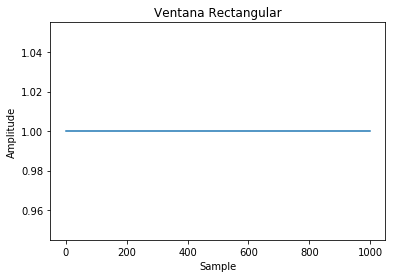

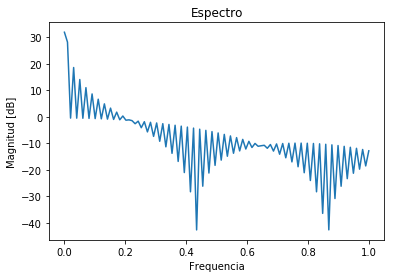

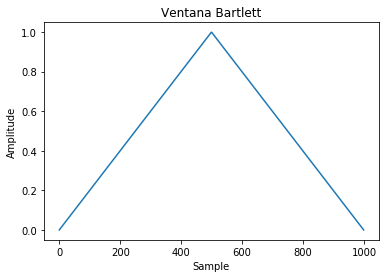

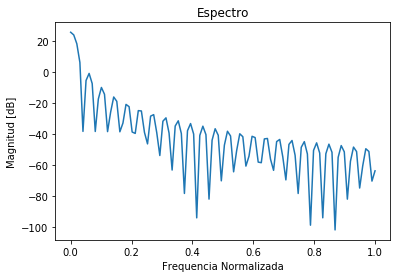

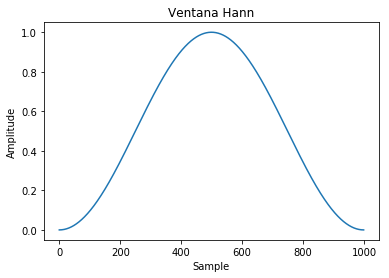

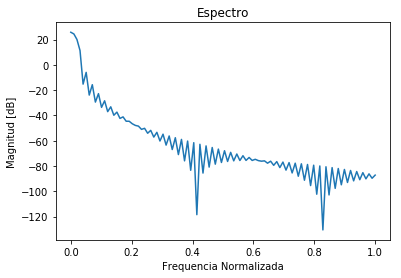

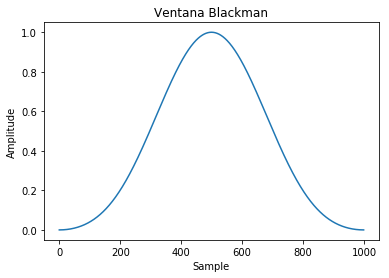

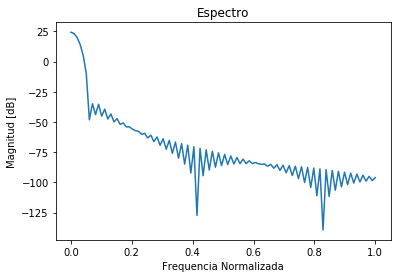

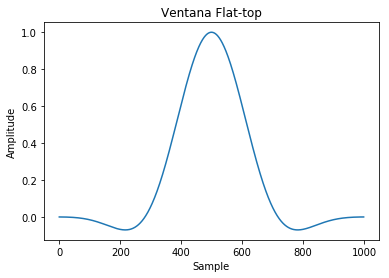

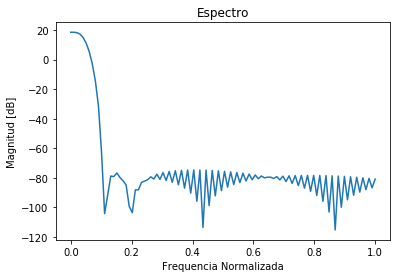

In [2]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
señal = 1

rectangular = Rectangular(N,señal)
bartlett = Bartlett(N,señal)
hann     = Hann(N,señal)
blackman = Blackman(N,señal)
flattop  = Flattop(N,señal)

sp0 = np.fft.fft(rectangular,2048)/25.5
sp1 = np.fft.fft(bartlett,2048)/25.5
sp2 = np.fft.fft(hann,2048)/25.5
sp3 = np.fft.fft(blackman,2048)/25.5
sp4 = np.fft.fft(flattop,2048)/25.5

freq = np.linspace(0, 1, 100)

plt.title('Ventana Rectangular' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(rectangular)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia")
plt.plot(freq, 20*np.log10(np.absolute(sp0)[0:100]))
plt.show()

plt.title('Ventana Bartlett' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(bartlett)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia Normalizada")
plt.plot(freq, 20*np.log10(np.absolute(sp1)[0:100]))
plt.show()

plt.title('Ventana Hann' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(hann)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia Normalizada")
plt.plot(freq, 20*np.log10(np.absolute(sp2)[0:100]))
plt.show()

plt.title('Ventana Blackman' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(blackman)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia Normalizada")
plt.plot(freq, 20*np.log10(np.absolute(sp3)[0:100]))
plt.show()

plt.title('Ventana Flat-top' )
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.plot(flattop)
plt.show()
plt.title('Espectro' )
plt.ylabel("Magnitud [dB]")
plt.xlabel("Frequencia Normalizada")
plt.plot(freq, 20*np.log10(np.absolute(sp4)[0:100]))
plt.show()


b) Construya una tabla en la que figure la anchura normalizada del lóbulo principal  de la ventana, $\Omega_1$, siendo 

$$ \lvert W(\Omega_1) \rvert = \frac{\sqrt{2}}{2}$$ 

y el valor de transferencia máxima de los lóbulos secundarios expresado en dB 

$$ W_2 = \mathop{max} \{\lvert W(\Omega) \rvert\} ,\space\space \forall \space \Omega \geq \Omega_0 $$

siendo $\Omega_0$ la frecuencia del primer cruce por cero $\lvert W(\Omega) \rvert\ = 0$ ó la frecuencia límite superior del lóbulo principal. Utilice como norma de frecuencia la frecuencia de Nyquist, de manera que las mediciones de frecuencias sean adimensionales y comparables independientemente de la frecuencia de muestreo.

In [3]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$f_1$ (#)', '$W_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$f_1$ (#),$W_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2)</b> Genere una señal bitonal de las siguientes características
</div>


  $  x(k) = x_1(k) + x_2(k) $

  $  x_1(k) = sen(\Omega_1·k)$

  $  x_2(k) = a_2 · sen(\Omega_2·k)   $

siendo 

  $\Omega_1 = \frac{\pi}{2}$

  $\Omega_2 = \Omega_1 + 10·\frac{2\pi}{N}$

  $a_2 = -40$ dB


Responda a las siguientes consignas:

<div class="alert alert-block alert-info">
<b>2.a)</b>  Calcule el espectro $ \lvert X(\Omega) \rvert $

</div>

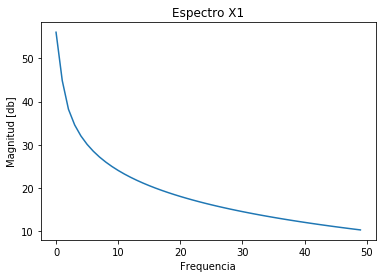

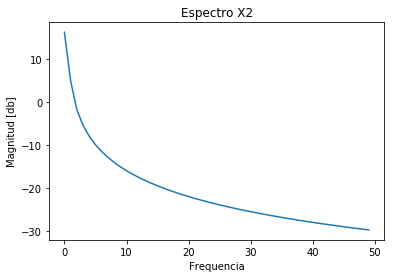

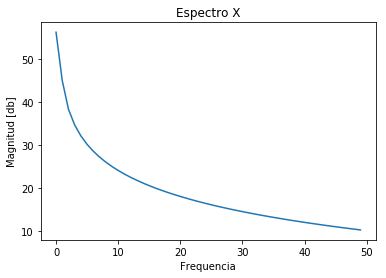

In [4]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pylab as plt
import scipy.signal as signal


N = 1000
fs = 1000
a2 = 10**(-40/20)

tt = np.linspace (0,((N-1)*(1/fs)),N)

O1 = np.pi /2
O2 = O1 + 10 *2*np.pi /N

x1 = np.sin(O1*tt)

x2 = a2*np.sin(O2*tt)

x = x1 + x2

sp1 = np.fft.fft(x1)
plt.title('Espectro X1' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp1)[0:50]))
plt.show()


sp2 = np.fft.fft(x2)
plt.title('Espectro X2' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp2)[0:50]))
plt.show()


sp3 = np.fft.fft(x)
plt.title('Espectro X' )
plt.ylabel("Magnitud [db]")
plt.xlabel("Frequencia")
plt.plot(20*np.log10(np.absolute(sp3)[0:50]))
plt.show()

maximoX1 = max(20*np.log10(np.absolute(sp1)[0:50]))

maximoX2 = max(20*np.log10(np.absolute(sp2)[0:50]))

maximoX = max(20*np.log10(np.absolute(sp3)[0:50]))

In [5]:
tus_resultados = [ 
                   maximoX1, # <-- acá debería haber numeritos :)
                   maximoX2, # <-- acá debería haber numeritos :)
                   maximoX # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['MAX (dB)'],
               index=[  
                        'X1',
                        'X2',
                        'X',
                     ])
HTML(df.to_html())

,MAX (dB)
X1,56.070776
X2,16.259222
X,56.159090


<div class="alert alert-block alert-info">
<b>2.b)</b> Repita a) disminuyendo la amplitud de $x_2$.
</div>

¿Cuál es el factor de escala mínimo de $x_2$, definido como $a^0_2$, que permite evidenciar su existencia en el espectro de $\lvert X(\Omega) \rvert$ ?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El valor minimo que puede optar la amplitud de X2, serian los "-56 db", que es el valor maximo que posee X1.
Quedando asi: a2 = 10**(-56/20)
</div>

In [29]:
a2B = 10**(-56/20)
x2B = a2B*np.sin(O2*tt)

xB = x1 + x2B

sp4 = np.fft.fft(x2B)
sp5 = np.fft.fft(xB)

maximoX2B = max(20*np.log10(np.absolute(sp4)[0:50]))

maximoXB = max(20*np.log10(np.absolute(sp5)[0:50]))

tus_resultados = [ 
                   maximoX1, # <-- acá debería haber numeritos :)
                   maximoX2B, # <-- acá debería haber numeritos :)
                   maximoXB # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['MAX (dB)'],
               index=[  
                        'X1',
                        'X2',
                        'X',
                     ])
HTML(df.to_html())

,MAX (dB)
X1,56.070776
X2,0.259222
X,56.084833


Considere ahora que esta señal proviene de un ADC de 16 bits. Incorpore al análisis el correspondiente ruido de cuantización. ¿Cómo afecta esta situación la medición de $x_2$?

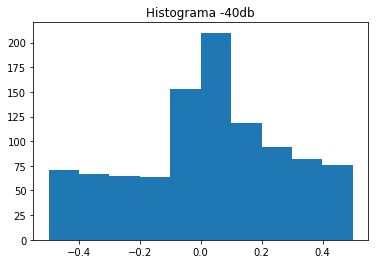

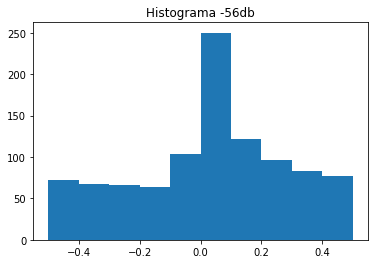

In [7]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
grillado = np.around(x)
error = grillado - x

plt.title('Histograma -40db' )
plt.hist(error)
plt.show()

grilladoB = np.around(xB)
errorB = grilladoB - xB

plt.title('Histograma -56db' )
plt.hist(errorB)
plt.show()


<div class="alert alert-block alert-info">
<b>2.c)</b> Repita a) incrementando la frecuencia de $x_1$ para $\Omega_1 = \frac{\pi}{2} + d_1·\frac{2\pi}{N}$ para valores de $d_1 = (0,01; 0.25; 0.5)$. Aumente la amplitud de $a_2$ hasta que se evidencie sobre el leakage y construya una tabla con dicho valor para las 3 situaciones correspondientes a desintonías leve, moderada y máxima.
</div>

In [8]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a_2$ (dB)'],
               index=[  
                        'leve',
                        'moderada',
                        'máxima',
                     ])
HTML(df.to_html())

,$a_2$ (dB)
leve,
moderada,
máxima,


<div class="alert alert-block alert-info">
<b>2.d)</b> Evalúe el efecto de utilizar las ventanas implementadas en 1). Complete la tabla comparativa con respecto a la ventana rectangular, respecto a las mediciones $a^0_2$ realizada en 2.b); y $a^1_2$ en 2.c) para el caso de desintonía máxima.
</div>

Grafique $\lvert X_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w(k) \} \rvert $ para las 4 ventanas de 1).

In [9]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################



In [10]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''], # <-- acá debería haber numeritos :)
                   ['', ''] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$a^0_2$ (dB)','$a^1_2$ (dB)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$a^0_2$ (dB),$a^1_2$ (dB)
Rectangular,,
Bartlett,,
Hann,,
Blackman,,
Flat-top,,


<div class="alert alert-block alert-info">
<b>2.e)</b> Para las ventanas analizadas en 1), decida cuál sería la más apropiada en el caso que, <b>sin afectar otro parámetro</b>, $\Omega_2$ pudiera acercarse libremente a $\Omega_1 = \frac{\pi}{2} + 0.5·\frac{2\pi}{N}$. Complete la siguiente tabla con la distancia mínima, $\Omega_0, $ a la que se puede distinguir $x_2$ en $\lvert X_w(\Omega) \rvert$.
</div>

In [11]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '', # <-- acá debería haber numeritos :)
                   '' # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$\Omega_0$ (#)'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$\Omega_0$ (#)
Rectangular,
Bartlett,
Hann,
Blackman,
Flat-top,


<div class="alert alert-block alert-info">
<b>3)</b> Genere la siguiente señal 

</div>

  $  x(k) = a_0·\mathop{sen}(\Omega_1·k)$


siendo 

  $a_0 = 2$

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y la variable aleatoria definida por

  $f_r \sim \mathcal{U}(-2, \, 2) $

Considere 200 realizaciones para cada experimento requerido en los siguiente incisos.incisos.


<div class="alert alert-block alert-info">
<b>3.a)</b> Calcule experimentalmente el sesgo y la varianza del siguiente estimador:
</div>

 
  $ \hat{a_0} = \lvert X^i_w(\Omega_0) \rvert$
  
siendo

  $\lvert X^i_w(\Omega) \rvert = \lvert \mathcal{F}\{ x(k) · w_i(k) \} \rvert $ 
  
para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

El sesgo y la varianza se definen para este caso como

  $ s_a = \mathop{E}\{ \hat{a_0}\} - a_0  $
    
  $ v_a = \mathop{var} \{ \hat{a_0} \} = \mathop{E}\{ ( \hat{a_0} - \mathop{E} \{ \hat{a_0} \} )^2 \} $
  
y pueden aproximarse cuando consideramos los valores esperados como las medias muestrales ($a=a_0$ para simplificar la notación)

  $ \mathop{E}\{ \hat{a_0}\}  = \hat{\mu_a} =  \frac{1}{M} \sum^{M-1}_{j=0} \hat{a_{j}} $
  
  $ s_a = \hat{\mu_a} - a  $
    
  $ v_a = \frac{1}{M} \sum^{M-1}_{j=0} (\hat{a_{j}} - \hat{\mu_a})^2 $



Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

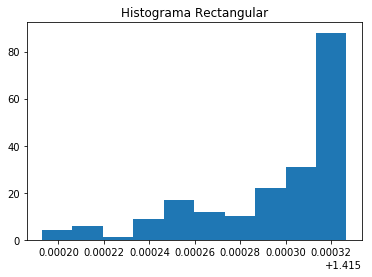

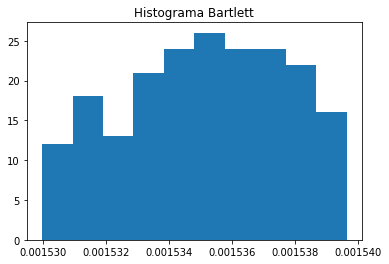

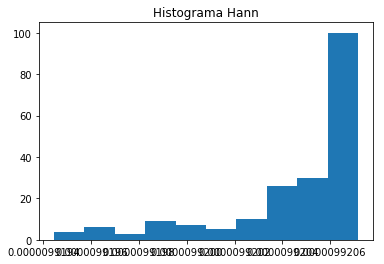

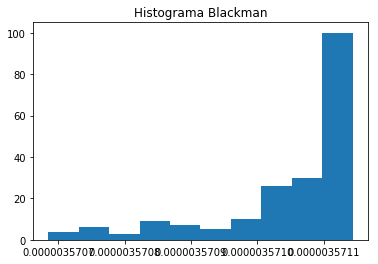

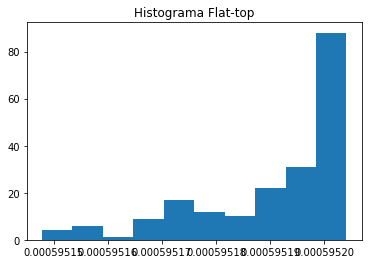

In [30]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pylab as plt
import scipy.signal as signal
import statistics as stats

N = 1000
fs = 1000
a0 = 2

tt = np.linspace (0,((N-1)*(1/fs)),N)

fr = np.random.uniform(-2, 2, 200)

O0 = np.pi /2
O1 = O0 + fr *2*np.pi /N

a = np.array([O1])

b = np.array([tt])

p = a.T * b

señal = a0*np.sin(p)

rectangular = Rectangular(N,señal)
bartlett = Bartlett(N,señal)
hann     = Hann(N,señal)
blackman = Blackman(N,señal)
flattop  = Flattop(N,señal)

sp0 = np.fft.fft(rectangular)
sp1 = np.fft.fft(bartlett)
sp2 = np.fft.fft(hann)
sp3 = np.fft.fft(blackman)
sp4 = np.fft.fft(flattop)

abs0 = np.absolute(sp0)
abs1 = np.absolute(sp1)
abs2 = np.absolute(sp2)
abs3 = np.absolute(sp3)
abs4 = np.absolute(sp4)

Est0 = abs0.T[250,]
Est1 = abs1.T[250,]
Est2 = abs2.T[250,]
Est3 = abs3.T[250,]
Est4 = abs4.T[250,]

Esp0  = stats.median(Est0)
Esp1  = stats.median(Est1)
Esp2  = stats.median(Est2)
Esp3  = stats.median(Est3)
Esp4  = stats.median(Est4)

Sesgo0 = Esp0 - a0
Var0  = stats.variance(Est0)

Sesgo1 = Esp1 - a0
Var1  = stats.variance(Est1)

Sesgo2 = Esp2 - a0
Var2  = stats.variance(Est2)

Sesgo3 = Esp3 - a0
Var3  = stats.variance(Est3)

Sesgo4 = Esp4 - a0
Var4  = stats.variance(Est4)

plt.title('Histograma Rectangular' )
plt.hist(Est0)
plt.show()
plt.title('Histograma Bartlett' )
plt.hist(Est1)
plt.show()
plt.title('Histograma Hann' )
plt.hist(Est2)
plt.show()
plt.title('Histograma Blackman' )
plt.hist(Est3)
plt.show()
plt.title('Histograma Flat-top' )
plt.hist(Est4)
plt.show()

In [13]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [Sesgo0, Var0], # <-- acá debería haber numeritos :)
                   [Sesgo1, Var1], # <-- acá debería haber numeritos :)
                   [Sesgo2, Var2], # <-- acá debería haber numeritos :)
                   [Sesgo3, Var3], # <-- acá debería haber numeritos :)
                   [Sesgo4, Var4], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-0.584699,1.180598e-09
Bartlett,-1.998466,6.836132e-12
Hann,-1.999990,1.059215e-19
Blackman,-1.999996,1.372460e-20
Flat-top,-1.999405,2.087750e-16


<div class="alert alert-block alert-info">
<b>3.b)</b> Repita a) para el siguiente estimador:
</div>

 
  $ \hat{a_1} = \sqrt{\frac{1}{5}·\sum_{j=a}^{b} \lvert X^i_w(j) \rvert ^2} $
  
siendo $ a = \Omega_0 - 2·\frac{2\pi}{N} $ y $ b = \Omega_0 + 2·\frac{2\pi}{N} $

para la *i*-ésima ventana de las 5 utilizadas en el punto 2).

Grafique los histogramas para  $\lvert X^i_w(\Omega_0) \rvert$. 

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Cuide que todos los gráficos tengan <b>el mismo rango de valores en X</b> para facilitar la comparación.
</div>

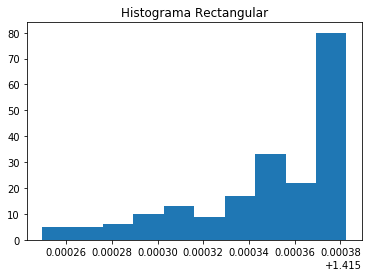

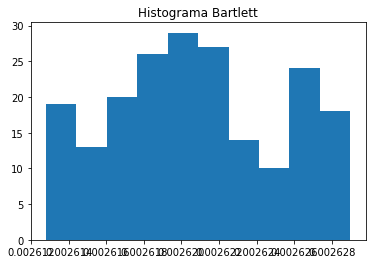

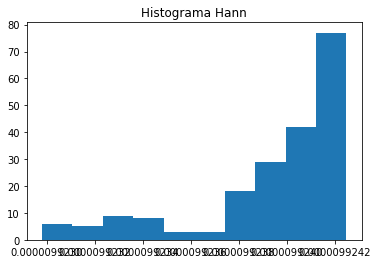

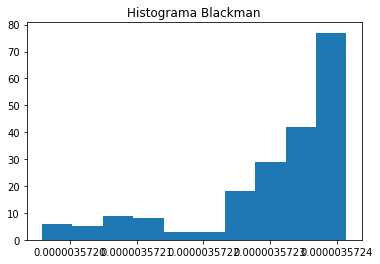

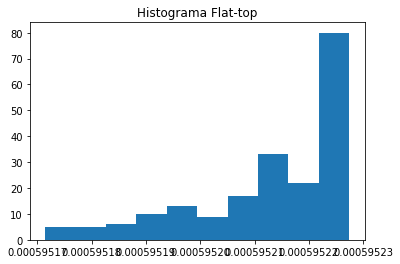

In [14]:
##########################################
# Acá podés generar los gráficos pedidos #
##########################################
interA = O0 - 4*np.pi /N
interB = O0 + 4*np.pi /N

Est0B = abs0.T[248:253,]
Est1B = abs1.T[248:253,]
Est2B = abs2.T[248:253,]
Est3B = abs3.T[248:253,]
Est4B = abs4.T[248:253,]

Est0CUA = Est0B**2
Est1CUA = Est1B**2
Est2CUA = Est2B**2
Est3CUA = Est3B**2
Est4CUA = Est4B**2

NewEst0 = (sum(Est0CUA)/5)**(1/2)
NewEst1 = (sum(Est1CUA)/5)**(1/2)
NewEst2 = (sum(Est2CUA)/5)**(1/2)
NewEst3 = (sum(Est3CUA)/5)**(1/2)
NewEst4 = (sum(Est4CUA)/5)**(1/2)

Esp0B  = stats.median(NewEst0)
Esp1B  = stats.median(NewEst1)
Esp2B  = stats.median(NewEst2)
Esp3B  = stats.median(NewEst3)
Esp4B  = stats.median(NewEst4)

Sesgo0B = Esp0B - a0
Var0B  = stats.variance(NewEst0)

Sesgo1B = Esp1B - a0
Var1B  = stats.variance(NewEst1)

Sesgo2B = Esp2B - a0
Var2B  = stats.variance(NewEst2)

Sesgo3B = Esp3B - a0
Var3B  = stats.variance(NewEst3)

Sesgo4B = Esp4B - a0
Var4B  = stats.variance(NewEst4)

plt.title('Histograma Rectangular' )
plt.hist(NewEst0)
plt.show()
plt.title('Histograma Bartlett' )
plt.hist(NewEst1)
plt.show()
plt.title('Histograma Hann' )
plt.hist(NewEst2)
plt.show()
plt.title('Histograma Blackman' )
plt.hist(NewEst3)
plt.show()
plt.title('Histograma Flat-top' )
plt.hist(NewEst4)
plt.show()


In [15]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [Sesgo0B, Var0B], # <-- acá debería haber numeritos :)
                   [Sesgo1B, Var1B], # <-- acá debería haber numeritos :)
                   [Sesgo2B, Var2B], # <-- acá debería haber numeritos :)
                   [Sesgo3B, Var3B], # <-- acá debería haber numeritos :)
                   [Sesgo4B, Var4B], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_a$', '$v_a$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


,$s_a$,$v_a$
Rectangular,-0.584643,1.180691e-09
Bartlett,-1.997380,1.973949e-11
Hann,-1.999990,1.060069e-19
Blackman,-1.999996,1.373563e-20
Flat-top,-1.999405,2.087914e-16
